# TP AI Prediction

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

# Reading our CSV file to a pandas DataFrame

In [52]:
# Handling rows with errors
delays_df = pd.read_csv(
    'Data/Lots_of_flight_data.csv',
    error_bad_lines=False
)

# Examining our Data

In [53]:
delays_df.head() # Check the top 5 rows

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225,210.0,197.0,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225,202.0,191.0,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105,90.0,80.0,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105,96.0,81.0,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100,92.0,80.0,580


In [54]:
delays_df.shape # Check the number of rows and columns

(300000, 16)

In [55]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              300000 non-null  object 
 1   OP_UNIQUE_CARRIER    300000 non-null  object 
 2   TAIL_NUM             299660 non-null  object 
 3   OP_CARRIER_FL_NUM    300000 non-null  int64  
 4   ORIGIN               300000 non-null  object 
 5   DEST                 300000 non-null  object 
 6   CRS_DEP_TIME         300000 non-null  int64  
 7   DEP_TIME             296825 non-null  float64
 8   DEP_DELAY            296825 non-null  float64
 9   CRS_ARR_TIME         300000 non-null  int64  
 10  ARR_TIME             296574 non-null  float64
 11  ARR_DELAY            295832 non-null  float64
 12  CRS_ELAPSED_TIME     300000 non-null  int64  
 13  ACTUAL_ELAPSED_TIME  295832 non-null  float64
 14  AIR_TIME             295832 non-null  float64
 15  DISTANCE         

# Handling duplicate rows and rows with missing values

In [56]:
# Remove rows with null values since thoes will crash our linear regression model
delays_df.dropna(inplace=True)

# Verifying our DataFrame
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295832 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              295832 non-null  object 
 1   OP_UNIQUE_CARRIER    295832 non-null  object 
 2   TAIL_NUM             295832 non-null  object 
 3   OP_CARRIER_FL_NUM    295832 non-null  int64  
 4   ORIGIN               295832 non-null  object 
 5   DEST                 295832 non-null  object 
 6   CRS_DEP_TIME         295832 non-null  int64  
 7   DEP_TIME             295832 non-null  float64
 8   DEP_DELAY            295832 non-null  float64
 9   CRS_ARR_TIME         295832 non-null  int64  
 10  ARR_TIME             295832 non-null  float64
 11  ARR_DELAY            295832 non-null  float64
 12  CRS_ELAPSED_TIME     295832 non-null  int64  
 13  ACTUAL_ELAPSED_TIME  295832 non-null  float64
 14  AIR_TIME             295832 non-null  float64
 15  DISTANCE         

In [57]:
# Finding duplicate rows
delays_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
299995    False
299996    False
299997    False
299998    False
299999    False
Length: 295832, dtype: bool

In [58]:
# Deleting the duplicate rows
delays_df.drop_duplicates(inplace=True)
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225,210.0,197.0,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225,202.0,191.0,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105,90.0,80.0,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105,96.0,81.0,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100,92.0,80.0,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2018-10-15,OH,N582NN,5248,CLT,TLH,1610,1607.0,-3.0,1737,1730.0,-7.0,87,83.0,61.0,386
299996,2018-10-15,OH,N582NN,5248,TLH,CLT,1808,1804.0,-4.0,1940,1927.0,-13.0,92,83.0,65.0,386
299997,2018-10-15,OH,N706PS,5250,CLT,CRW,750,745.0,-5.0,901,859.0,-2.0,71,74.0,41.0,221
299998,2018-10-15,OH,N706PS,5250,CRW,CLT,931,926.0,-5.0,1052,1039.0,-13.0,81,73.0,44.0,221


# Reset Index

In [59]:
delays_df.reset_index(drop=True)

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225,210.0,197.0,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225,202.0,191.0,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105,90.0,80.0,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105,96.0,81.0,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100,92.0,80.0,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295827,2018-10-15,OH,N582NN,5248,CLT,TLH,1610,1607.0,-3.0,1737,1730.0,-7.0,87,83.0,61.0,386
295828,2018-10-15,OH,N582NN,5248,TLH,CLT,1808,1804.0,-4.0,1940,1927.0,-13.0,92,83.0,65.0,386
295829,2018-10-15,OH,N706PS,5250,CLT,CRW,750,745.0,-5.0,901,859.0,-2.0,71,74.0,41.0,221
295830,2018-10-15,OH,N706PS,5250,CRW,CLT,931,926.0,-5.0,1052,1039.0,-13.0,81,73.0,44.0,221


# Data Visualization

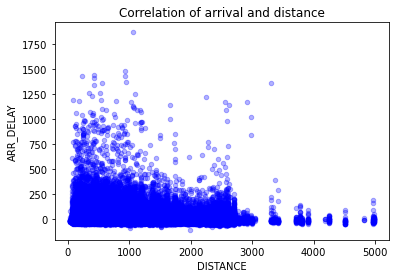

In [60]:
# Check if there is a relationship between the distance of a flight and how late it is
delays_df.plot(
    kind = 'scatter',
    x = 'DISTANCE',
    y = 'ARR_DELAY',
    color = 'blue',
    alpha = 0.3,
    title = 'Correlation of arrival and distance'
)

plt.show()

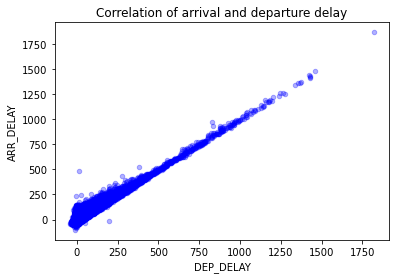

In [61]:
# Check if there is a relationship between the departure delay of a flight and the arrival delay
delays_df.plot(
    kind = 'scatter',
    x = 'DEP_DELAY',
    y = 'ARR_DELAY',
    color = 'blue',
    alpha = 0.3,
    title = 'Correlation of arrival and departure delay'
)

plt.show()

# Splitting our data and training the model

In [62]:
# Move our features into X DataFrame
X = delays_df.loc[:, ['DEP_DELAY']]

# Move our labels into the y DataFrame
y = delays_df.loc[:, ['ARR_DELAY']]

# Split our data into test and training DataFrames
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42
                                                    )

regressor = LinearRegression() # Set up an instance of that class
regressor.fit(X_train, y_train) # Passing the data to our model

LinearRegression()

# Make predictions / Test the model

In [63]:
# Make predictions / Test the model
y_pred = regressor.predict(X_test)
y_pred

array([[-3.63535628],
       [-8.68666396],
       [-4.64561782],
       ...,
       [-7.67640242],
       [-9.6969255 ],
       [-7.67640242]])

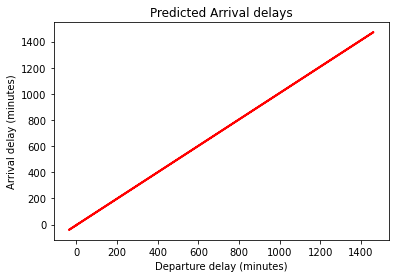

In [64]:
# Building our chart
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Predicted Arrival delays')
plt.plot(
    X_test, # Departure delay
    y_pred, # Arrival delay
    color = 'red',
    linewidth = 2
)

plt.show()

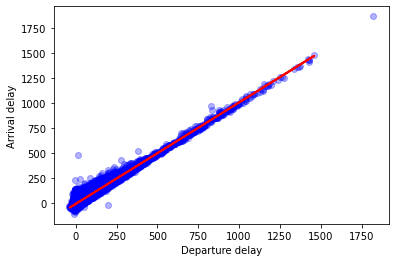

In [65]:
# If I wanna see that linear regression red line on top of my scatter plot (éli hiya la courbe bta3 él data)
plt.xlabel('Departure delay')
plt.ylabel('Arrival delay')

# This plot represents my linear regression red line
plt.plot(
    X_test,
    y_pred,
    color = 'red',
    linewidth = 2
)

# This is my scatter plot (qui représente my data)
plt.scatter(
    x = delays_df['DEP_DELAY'],
    y = delays_df['ARR_DELAY'],
    color = 'blue',
    alpha = 0.3
)

plt.show()


# Comparing y_pred to y_test

In [66]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,-3.635356
1,-8.686664
2,-4.645618
3,-11.717449
4,-11.717449
...,...
88745,-8.686664
88746,-7.676402
88747,-7.676402
88748,-9.696925


In [67]:
y_test

,ARR_DELAY
291483,-5.0
98997,-12.0
23454,-9.0
110802,-14.0
49449,-20.0
...,...
209898,-20.0
22210,-9.0
165727,-6.0
260838,-33.0


# Measuring accuracy

### First method: Mean Squared Error (MSE)

In [68]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred)) # y_test: my actual values / y_pred: the predicted values 

Mean Squared Error:  190.94923411810075


### Second method: R^2 or R-Squared

In [69]:
print('R^2: ', metrics.r2_score(y_test, y_pred))
# The higer the R-Squared, the better the model.

R^2:  0.9151586086984398


# Writing a DataFrame contents to a CSV file

In [70]:
delays_df.to_csv('Data/cleaned_data.csv')